In [2]:
import mediapipe as mp
import supervision as sv
from tqdm import tqdm

In [3]:
VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

In [4]:
model = mp.solutions.face_mesh.FaceMesh()
edge_annotator = sv.EdgeAnnotator(color=sv.Color.WHITE, thickness=1)

In [5]:
def process_frame(frame):
    resolution_wh = (frame.shape[1], frame.shape[0])  # Width, Height from frame
    results = model.process(frame)
    key_points = sv.KeyPoints.from_mediapipe(results, resolution_wh=resolution_wh)
    return edge_annotator.annotate(frame, key_points)

In [6]:
frame_generator = sv.get_video_frames_generator(source_path=VIDEO_PATH)

with sv.VideoSink(VIDEO_OUT, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        annotated_frame = process_frame(frame)
        sink.write_frame(annotated_frame)

 18%|█▊        | 90/510 [00:05<00:25, 16.37it/s]


KeyboardInterrupt: 

# DataProcessor tests

In [1]:
import sys
import os

src_path = os.path.abspath(os.path.join('../../../', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from tools.data_processor import DataProcessor

### SupervisionVertexProcessor

In [11]:
from tools.frame_processors import SupervisionVertexProcessor

VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(SupervisionVertexProcessor())
dp.process_video(VIDEO_PATH)

100%|██████████| 510/510 [00:07<00:00, 63.96it/s]


#### With Face Extraction

In [3]:
from tools.frame_processors import SupervisionVertexProcessor
from tools.frame_preprocessors import FaceExtractionPreprocessor

VIDEO_PATH = "example2.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(
    frame_processor=SupervisionVertexProcessor(),
    frame_preprocessor=FaceExtractionPreprocessor(
        skip_bad_frames=True
    )
)
dp.process_video(VIDEO_PATH)

100%|██████████| 1043/1043 [00:35<00:00, 29.52it/s]


### SupervisionVertexProcessorWithFrontalization

In [4]:
from tools.frame_processors import SupervisionVertexProcessorWithFrontalization
from tools.frame_preprocessors import FaceExtractionPreprocessor

VIDEO_PATH = "example2.mp4"
REFERENCE_POINTS_PATH = "key_points_xyz.npy"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(
    frame_processor=SupervisionVertexProcessorWithFrontalization(
        reference_points_path=REFERENCE_POINTS_PATH
    ),
    frame_preprocessor=FaceExtractionPreprocessor(
        skip_bad_frames=True
    )
)
dp.process_video(VIDEO_PATH, VIDEO_OUT)

100%|██████████| 1043/1043 [00:36<00:00, 28.78it/s]


### SupervisionEdgesProcessor

In [8]:
from tools.frame_processors import SupervisionEdgesProcessor

VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(SupervisionEdgesProcessor())
dp.process_video(VIDEO_PATH)

 25%|██▍       | 125/510 [00:08<00:26, 14.54it/s]


### Google Face Landmarker

#### Tests

In [4]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt


BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=src_path + '/models/face_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE,
    output_face_blendshapes=True,
    output_facial_transformation_matrixes=True,
    num_faces=1
)

landmarker = FaceLandmarker.create_from_options(options)


In [5]:
TEST_IMAGE = "test_image2.jpg"
TEST_IMAGE_PATH = os.path.abspath(os.path.join('..', 'test_images', TEST_IMAGE))

In [6]:

mp_image = mp.Image.create_from_file(TEST_IMAGE_PATH)

image_data = mp_image.numpy_view()
image_bgr = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)

cv2.imshow('MediaPipe Image', image_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:

face_landmarker_result = landmarker.detect(mp_image)

face_landmarker_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5364461541175842, y=0.2776353657245636, z=-0.022411441430449486, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5379387140274048, y=0.25371024012565613, z=-0.06193025782704353, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536247968673706, y=0.2598191499710083, z=-0.028673112392425537, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5250496864318848, y=0.22575457394123077, z=-0.05383279174566269, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5375166535377502, y=0.24548958241939545, z=-0.06765517592430115, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536074161529541, y=0.23402781784534454, z=-0.06557483971118927, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5319803357124329, y=0.2055772840976715, z=-0.042002007365226746, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.44470280408859253, y=0.20130568742752075, z=-0.0022403548937290907, visibility=0.0, presence=0.0), Normalize

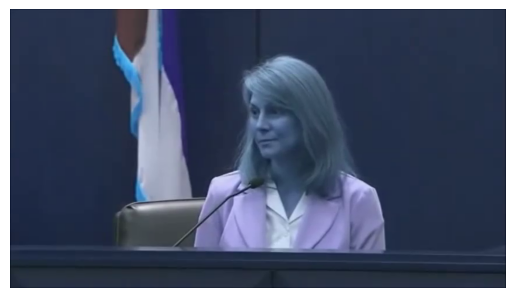

In [7]:
np_frame = np.load('test_frame.npy')

plt.imshow(np_frame)
plt.axis('off')
plt.show()

In [8]:
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))

face_landmarker_result = landmarker.detect(mp_image)

face_landmarker_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.4704388976097107, y=0.49434590339660645, z=-0.06727760285139084, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.46655234694480896, y=0.4402081072330475, z=-0.11753886193037033, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4726347327232361, y=0.4593470096588135, z=-0.0635276809334755, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4614623785018921, y=0.39374426007270813, z=-0.08065987378358841, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4676939845085144, y=0.4248233735561371, z=-0.12386596202850342, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4727458655834198, y=0.4069201350212097, z=-0.11380551755428314, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.489240437746048, y=0.36430811882019043, z=-0.05153947323560715, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.35681647062301636, y=0.34828054904937744, z=0.06617742031812668, visibility=0.0, presence=0.0), NormalizedLandm

#### Detection

In [2]:
from tools.frame_processors import GoogleFaceLandmarkDetectionProcessor


VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"
dp = DataProcessor(GoogleFaceLandmarkDetectionProcessor(os.path.join(src_path, "models/face_landmarker.task")))
dp.process_video(VIDEO_PATH)

c:\Users\Bartosz\Desktop\automatic-lie-detection\src\models/face_landmarker.task


100%|██████████| 510/510 [00:08<00:00, 60.23it/s]
